## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
with psycopg2.connect(database="db_ds_students", 
                      user="readonly", 
                      password="6hajV34RTQfmxhS", 
                      host="dsstudents.skillbox.ru") as conn:
  data = pd.read_sql("select * from exploratory", conn).astype('float')
data

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664
...,...,...,...,...,...
95,0.107649,-3.101786,56.490912,-1.993768,-0.333903
96,1.759630,-1.428565,1.264442,-1.298354,-2.513746
97,0.843823,1.187656,-1.410026,0.566681,1.002171
98,0.867154,1.111556,-1.331718,0.513167,0.963890


## Гистограммы

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

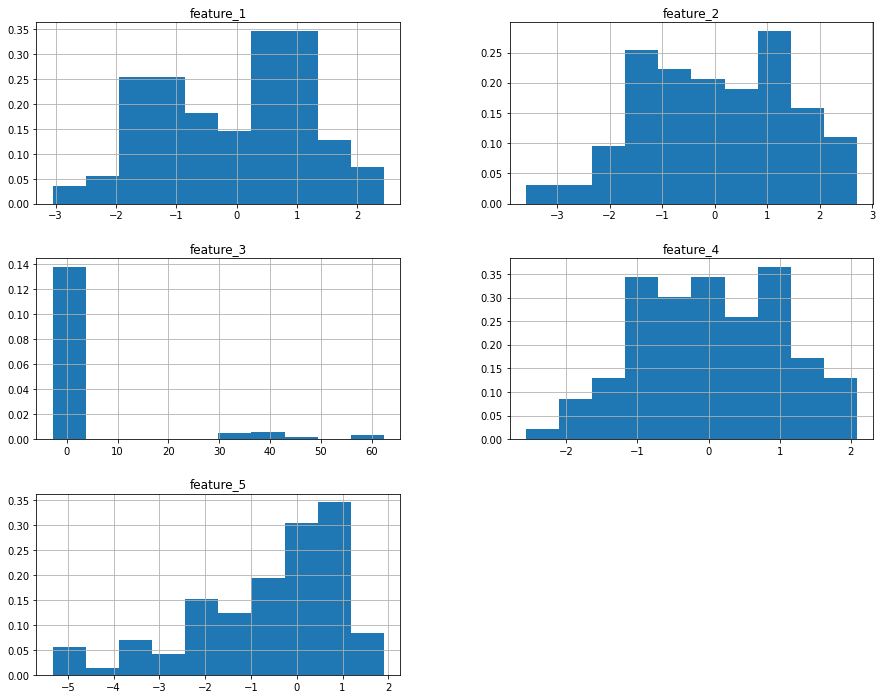

In [3]:
data.hist(density=True, figsize=(15, 12), bins=10);

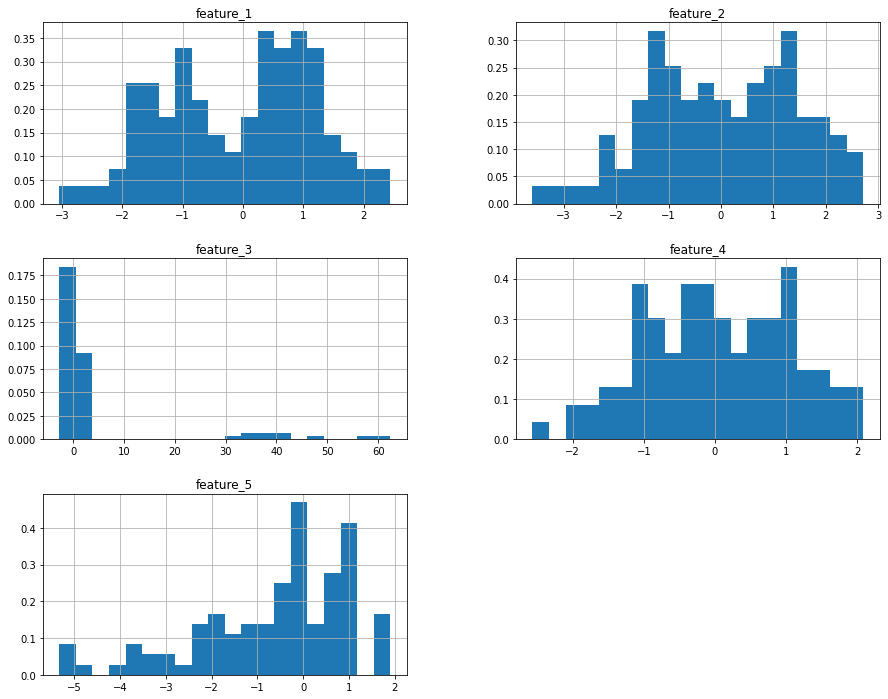

In [15]:
data.hist(density=True, figsize=(15, 12), bins=20);

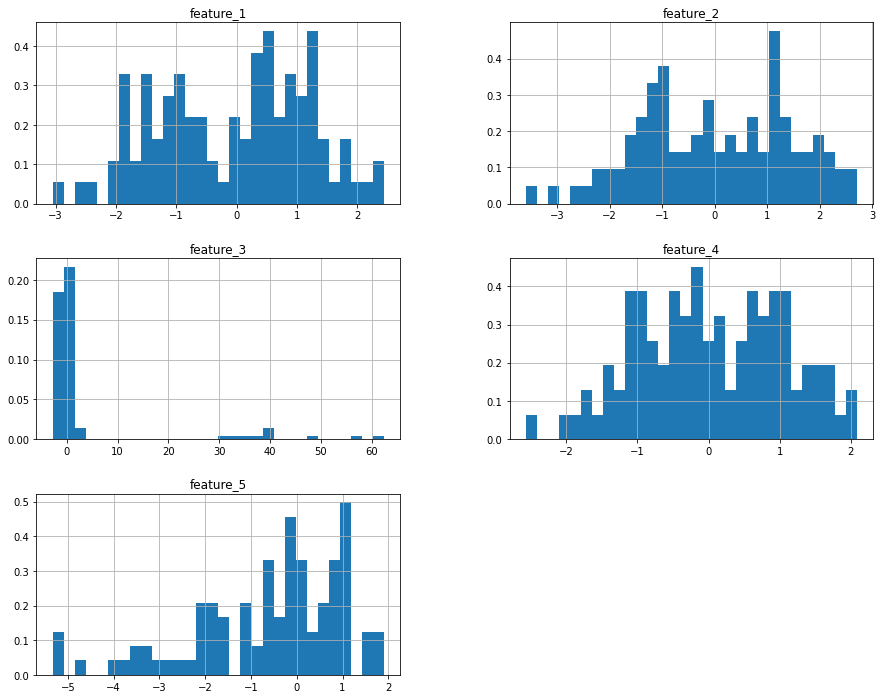

In [5]:
data.hist(density=True, figsize=(15, 12), bins=30);

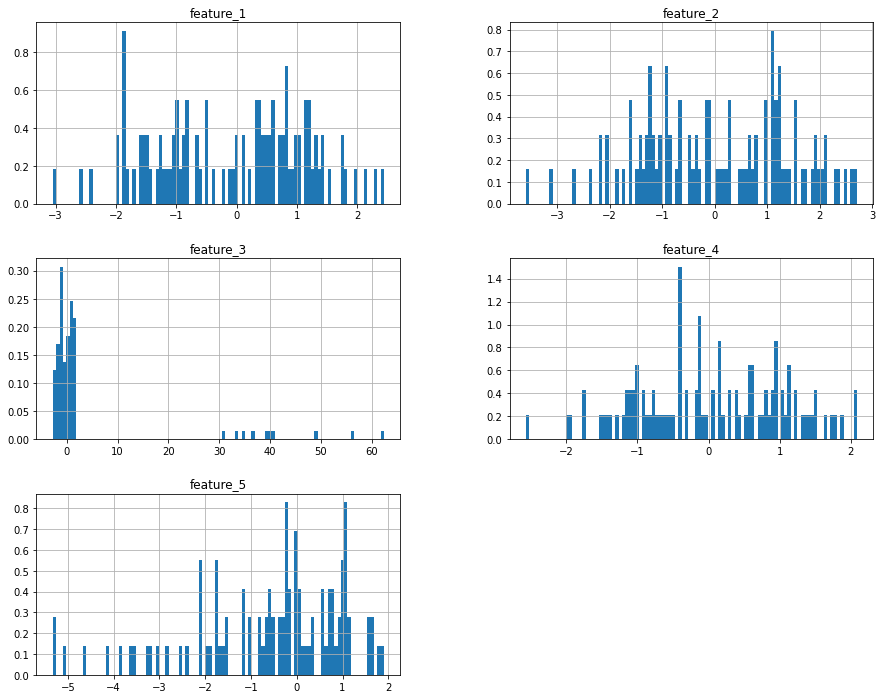

In [12]:
data.hist(density=True, figsize=(15, 12), bins=100);

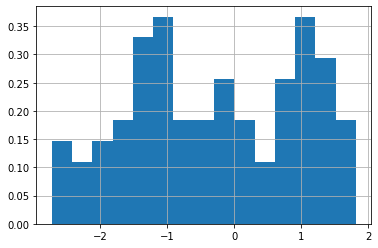

In [31]:
data.query("feature_3 < 10").feature_3.hist(density=True, bins=15);

### Описание

Гистограмма feature_1 напоминает бимодальное распределение (особенно на при bin=30), каждое из распределений, составлящих его, несколько скошаны влево. Процентов $40$ данных находятся в промежетке $[-2; -1.6]$ и еще столько же на $[0; 1.6]$.

feture_2, похоже, тоже имеет бимодальное распределение, но их центры ближе друг к другу, чем в первом случае. Основаня часть данных находится на промежутке $[-1.6; 1.5]$

feature_3 имеет выбросы, если отних избавиться то гистограмма будет напоминать равномерное распределение (с некоторым допущением) или очередное бимодальное :)). $4/5$ данных дежат на [-1.8; 1.8]

Форма гистограммы feature_4 похожа на нормальное распределение с центром около нуля. Около 80% данных расположено в промежутке $[-1; 1]$.

Распределение feature_5 перекошано влево. Основная часть данных сосредоточена на промежутке $[-1; 1]$.




## Ящик с усами
Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

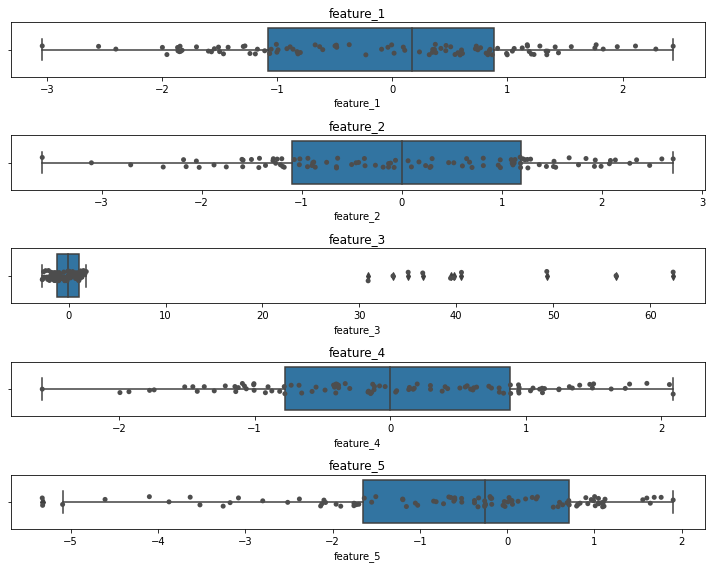

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(10, 8))

for name, ax in zip(data.columns, axs.flat):
  sns.boxplot(x=data[name], ax=ax)
  sns.stripplot(x=data[name], ax=ax, color=".3")
  ax.set_title(name)

fig.tight_layout();

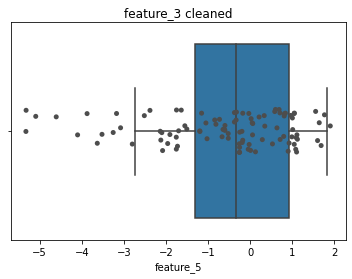

In [39]:
ax = sns.boxplot(x=data.query("feature_3 < 10")["feature_3"])
sns.stripplot(x=data[name], ax=ax, color=".3")
ax.set_title("feature_3 cleaned");

### Описание

Выбросы видны на графиках для feature_3 и feature_5, а также для feature_3, очещенном от явного мусора.

## Scatter

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

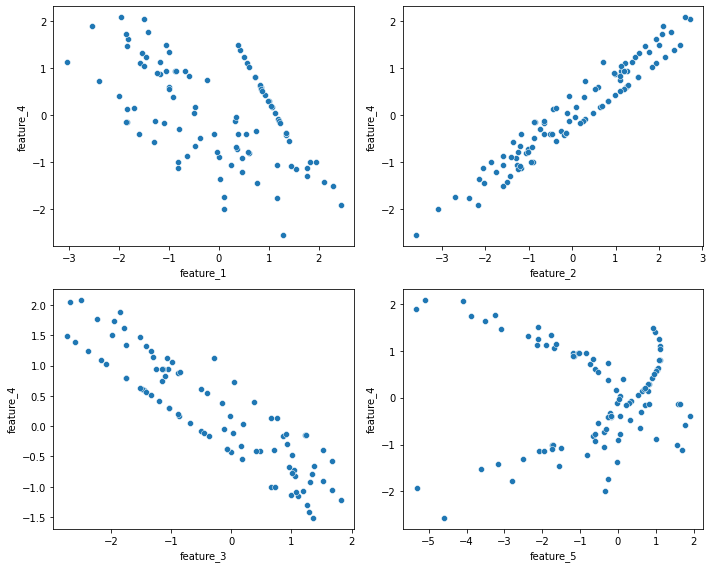

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for name, ax in zip(data.iloc[:, [0, 1, 2, 4]].columns, axs.flat):
  if name == "feature_3":
    x = data.query(f"{name} < 10")[name]
  else:
    x = data[name]
  sns.scatterplot(x=x, y=data["feature_4"], ax=ax)

fig.tight_layout()

### Описание

Лучше всего для предсказания feature_4 с помощью линейной регресси исаользовать feature_2 и feature_3, очищенную от выбросов. feature_1 тоже обладает некоторой предсказательной силой для feature_4. Стоит сравнить две модели: с feature_1 и без нее.